In [57]:
!python --version

Python 3.8.0


In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
df = pd.read_csv('CreditCardDefaultPayment.csv')

In [60]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
1,50000,1,1,2,37,0,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,0
2,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
3,100000,2,2,2,23,0,-1,-1,0,0,...,221,-159,567,380,601,0,581,1687,1542,0
4,140000,2,3,1,28,0,0,2,0,0,...,12211,11793,3719,3329,0,432,1000,1000,1000,0


In [61]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   1001 non-null   int64
 1   SEX                         1001 non-null   int64
 2   EDUCATION                   1001 non-null   int64
 3   MARRIAGE                    1001 non-null   int64
 4   AGE                         1001 non-null   int64
 5   PAY_0                       1001 non-null   int64
 6   PAY_2                       1001 non-null   int64
 7   PAY_3                       1001 non-null   int64
 8   PAY_4                       1001 non-null   int64
 9   PAY_5                       1001 non-null   int64
 10  PAY_6                       1001 non-null   int64
 11  BILL_AMT1                   1001 non-null   int64
 12  BILL_AMT2                   1001 non-null   int64
 13  BILL_AMT3                   1001 non-null   int64
 14  BILL_AMT

In [63]:
df.shape

(1001, 24)

In [64]:
df.isna().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [65]:
df['default payment next month'].value_counts()

default payment next month
0    787
1    214
Name: count, dtype: int64

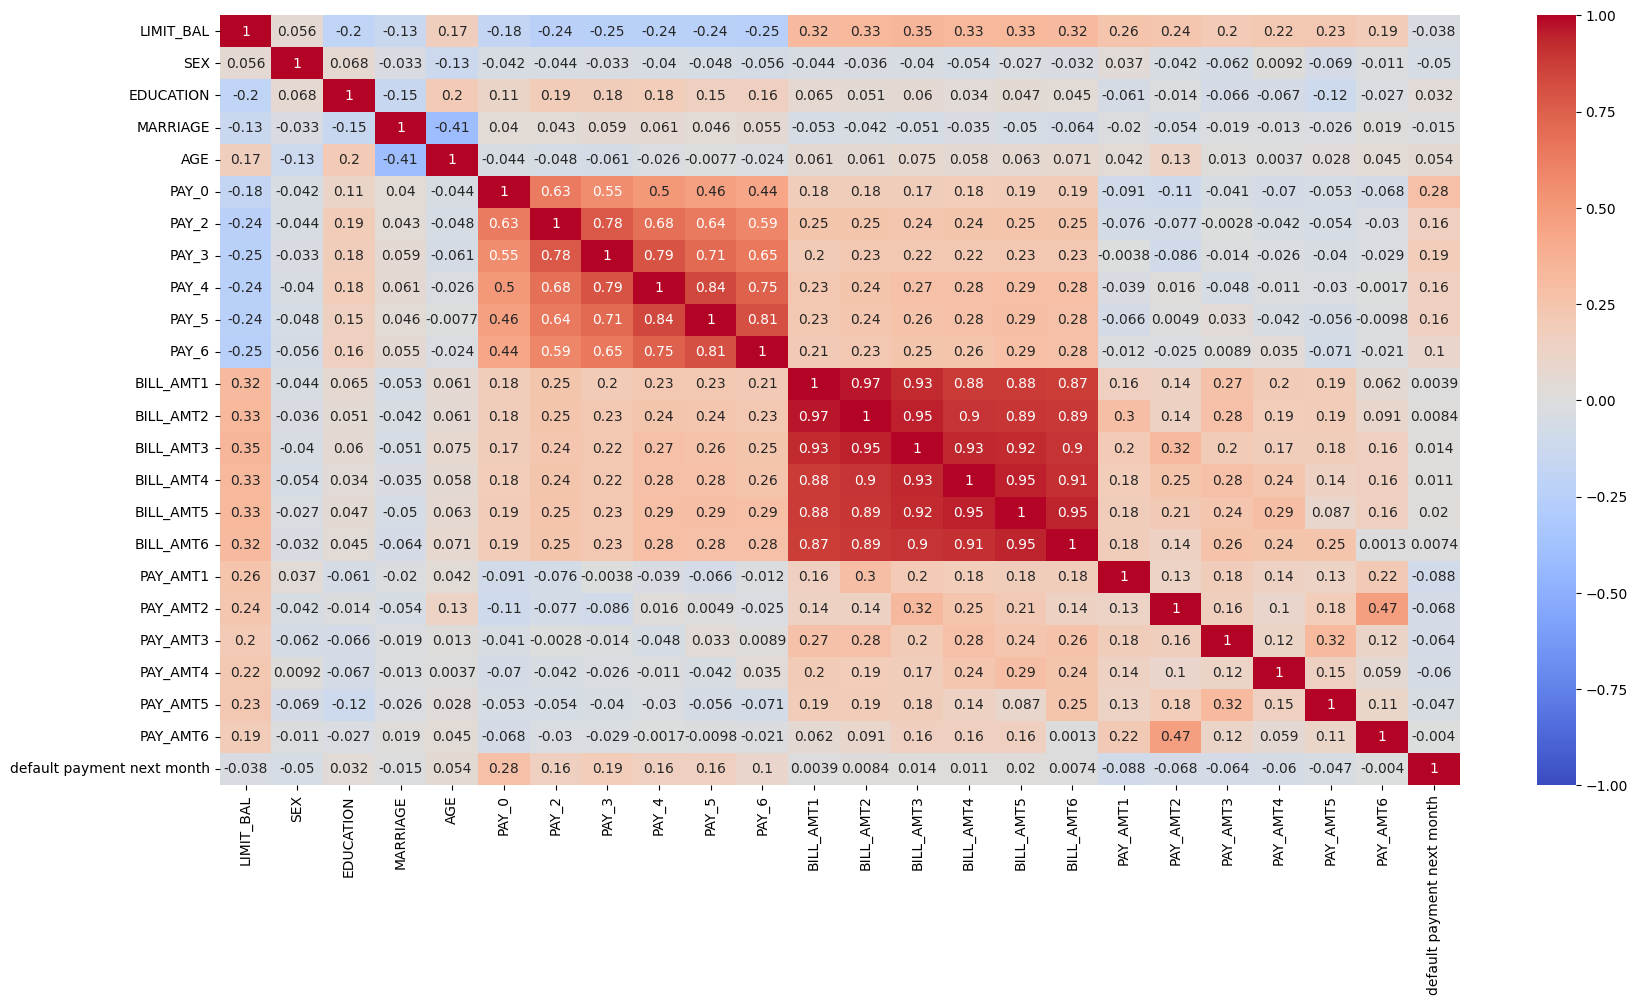

In [66]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

In [67]:
# corr_matrix = df.corr()
# threshold = 0.05
# selected_columns = []
# # Iterate through the correlation matrix
# for column in df.columns:
#     # Exclude the column itself (correlation with itself is always 1.0)
#     if column != 'default payment next month': 
#         # Check if the absolute correlation is greater than the threshold
#         if abs(corr_matrix['default payment next month'][column]) > threshold:
#             selected_columns.append(column)

# # Extract the selected columns from the DataFrame
# df = pd.concat([df[selected_columns], df['default payment next month']], axis=1)

In [68]:
from imblearn.combine import SMOTETomek
resampler = SMOTETomek(sampling_strategy='minority',random_state=42)

In [69]:
df_resampled, y_resampled = resampler.fit_resample(df, df['default payment next month'])

In [70]:
df_resampled['default payment next month'].value_counts()

default payment next month
0    739
1    739
Name: count, dtype: int64

In [71]:
# My realmeBook is not compatable with this, it is too cpu hungry task
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title = 'Pandas Profile Reprot')
# profile.to_widgets()

In [72]:
df_resampled.shape

(1478, 24)

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [74]:
X = df_resampled.drop('default payment next month',axis = 1)
y = df_resampled['default payment next month']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 42)

In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((1108, 23), (1108,), (370, 23), (370,))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
models = {
    'LogisticRegression':LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'RandomForestClassifier':RandomForestClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'ExtraTreesClassifier':ExtraTreesClassifier(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'SVC':SVC(),
    'XGBClassifier':XGBClassifier(),
    'CatBoostClassifier':CatBoostClassifier(verbose=0),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'GaussianNB':GaussianNB()
    }

In [ ]:
score = []
for name, model in models.items():
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print(name,':',accuracy_score(y_test,y_pred))
    score.append(accuracy_score(y_test,y_pred))

LogisticRegression : 0.7108108108108108
GaussianNB : 0.6162162162162163
RandomForestClassifier : 0.845945945945946
GradientBoostingClassifier : 0.8
AdaBoostClassifier : 0.7378378378378379
BaggingClassifier : 0.8
ExtraTreesClassifier : 0.8540540540540541
KNeighborsClassifier : 0.7351351351351352
SVC : 0.7486486486486487
XGBClassifier : 0.8432432432432433
CatBoostClassifier : 0.8351351351351352
DecisionTreeClassifier : 0.7405405405405405


In [ ]:
best_model_name = score.index(max(score))
best_model = list(models.keys())[best_model_name]
best_model

'ExtraTreesClassifier'